Perform one-way and two-way ANOVA on some toy data.
Code is from
https://www.georgeho.org/tests-as-linear/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

In [22]:
import os

os.environ["FIG_DIR"] = "/Users/kpmurphy/github/bookv2/figures"
os.environ["LATEXIFY"] = "1"

latexify(fig_height=1.5)

In [27]:
def one_way_anova_plot():
    # Construct data as a pd.DataFrame
    a = np.random.normal(0, 1, 20)
    b = np.random.normal(-2, 1, 20)
    c = np.random.normal(3, 1, 20)
    d = np.random.normal(1.5, 1, 20)

    df = pd.DataFrame()
    df["y"] = np.concatenate([a, b, c, d])
    df["group_2"] = np.concatenate([np.zeros_like(b)] + [np.ones_like(b)] + 2 * [np.zeros_like(b)])
    df["group_3"] = np.concatenate(2 * [np.zeros_like(c)] + [np.ones_like(c)] + [np.zeros_like(c)])
    df["group_4"] = np.concatenate(3 * [np.zeros_like(d)] + [np.ones_like(d)])

    # ANOVA equivalent linear model
    res = smf.ols("y ~ 1 + group_2 + group_3 + group_4", df).fit()
    beta0, beta1, beta2, beta3 = res.params

    # Plot
    # fig, ax = plt.subplots(figsize=[10,5])
    fig, ax = plt.subplots()
    ax.scatter(0 * np.ones_like(a), a, color="k")
    ax.scatter(1 * np.ones_like(b), b, color="k")
    ax.scatter(2 * np.ones_like(c), c, color="k")
    ax.scatter(3 * np.ones_like(d), d, color="k")

    # Group 1 (baseline)
    ax.axhline(beta0, color="b", label=r"$\beta_0$ (group 1 mean)")

    # Group 2
    ax.plot([0.7, 1.3], 2 * [beta0 + beta1], color="navy")
    ax.plot(
        [0, 1],
        [beta0, beta0 + beta1],
        color="r",
        label=r"$\beta_1, \beta_2, ...$ (slopes/differences to $\beta_0$)",
    )

    # Group 3
    ax.plot(
        [1.7, 2.3],
        2 * [beta0 + beta2],
        color="navy",
        label=r"$\beta_0+\beta_1, \beta_0+\beta_2 ...$ (group 2, 3 ... means)",
    )
    ax.plot([1, 2], [beta0, beta0 + beta2], color="r")

    # Group 4
    ax.plot([2.7, 3.3], 2 * [beta0 + beta3], color="navy")
    ax.plot([2, 3], [beta0, beta0 + beta3], color="r")

    ax.legend(fontsize="large")

    return fig, ax

saving image to /Users/kpmurphy/github/bookv2/figures/anova_one_way_latexified.pdf
Figure size: [6.  1.5]


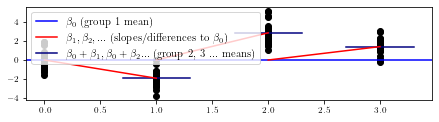

In [29]:
np.random.seed(1618)
fig, ax = one_way_anova_plot()

# plt.tight_layout()
savefig("anova_one_way")

plt.show()

In [31]:
def two_way_anova_plot(df):
    res = smf.ols("y ~ 1 + group * mood", df).fit()
    beta_0, beta_b, beta_c, beta_sad, beta_b_sad, beta_c_sad = res.params

    # Logical masks
    is_a = df["group"] == "a"
    is_b = df["group"] == "b"
    is_c = df["group"] == "c"
    is_happy = df["mood"] == "happy"
    is_sad = df["mood"] == "sad"

    # Plot
    # fig, ax = plt.subplots(figsize=[10, 8])
    fig, ax = plt.subplots()
    ax.scatter(0 * np.ones(10), df["y"][is_a & is_happy], color="r")
    ax.scatter(0 * np.ones(10), df["y"][is_a & is_sad], color="b")
    ax.scatter(1 * np.ones(10), df["y"][is_b & is_happy], color="r")
    ax.scatter(1 * np.ones(10), df["y"][is_b & is_sad], color="b")
    ax.scatter(2 * np.ones(10), df["y"][is_c & is_happy], color="r")
    ax.scatter(2 * np.ones(10), df["y"][is_c & is_sad], color="b")

    # Group a
    # ax.axhline(beta_0, color="r", label="happy")
    ax.plot([-0.3, 0.3], 2 * [beta_0], color="r", label="happy")
    ax.plot([-0.3, 0.3], 2 * [beta_0 + beta_sad], color="b", label="sad")

    # Group b
    ax.plot([0.7, 1.3], 2 * [beta_0 + beta_b], color="r")
    ax.plot([0.7, 1.3], 2 * [beta_0 + beta_b + beta_sad + beta_b_sad], color="b")

    # Group c
    ax.plot([1.7, 2.3], 2 * [beta_0 + beta_c], color="r")
    ax.plot([1.7, 2.3], 2 * [beta_0 + beta_c + beta_sad + beta_c_sad], color="b")

    ax.legend(fontsize="large")

    return fig, ax

In [9]:
num_points = 20
np.random.seed(1618)

a = np.random.normal(0.0, 1, num_points)
b = np.random.normal(3.0, 1, num_points)
c = np.random.normal(-1.5, 1, num_points)

df = pd.DataFrame()
df["y"] = np.concatenate([a, b, c])
df["group"] = list("".join([num_points * char for char in "abc"]))
df = df.join(pd.get_dummies(df.group, prefix="group", drop_first=True).astype(np.float64))

df["mood"] = (df.shape[0] // 2) * ["happy", "sad"]
df = df.join(pd.get_dummies(df.mood, prefix="mood").astype(np.float64))

df.head()

,y,group,group_b,group_c,mood,mood_happy,mood_sad
0,-1.580020,a,0.0,0.0,happy,1.0,0.0
1,0.835402,a,0.0,0.0,sad,0.0,1.0
2,0.635347,a,0.0,0.0,happy,1.0,0.0
3,-0.820451,a,0.0,0.0,sad,0.0,1.0
4,-0.398397,a,0.0,0.0,happy,1.0,0.0


saving image to /Users/kpmurphy/github/bookv2/figures/anova_two_way_latexified.pdf
Figure size: [6.  1.5]


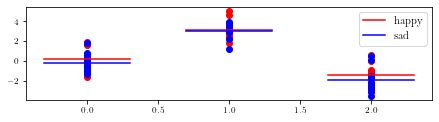

In [32]:
fig, ax = two_way_anova_plot(df)

# plt.tight_layout()
savefig("anova_two_way")

plt.show()